# Visualize patches 

In [38]:
import numpy as np
import os
import rasterio as rio
import matplotlib
import matplotlib.pyplot as plt

def make_img(rf):
    valid_centers = rf.read(2).astype(np.float16)
    split_mask = rf.read(3).astype(np.float16)
    valid_mask = rf.read(4).astype(np.float16)
    polygon = rf.read_masks(1)
    img = split_mask.copy()
    img += 2
    img[valid_mask==0.] = 1
    img[valid_centers==0.] = 0
    img[polygon==0] = np.nan
    return img
    

def plot_patches(project_ids, tif_dir="/home/eliot/igp/pdm/rs-uncertainty/data/pkl/2023-03-09_12-47-53/"):
    """
    Black: invalid pixels from `valid_mask`
    white: invalid centers from `valid_center_mask`
    Yellow: valid training centers
    Blue: valid validation centers
    Red: valid test centers
    """
    #assert len(project_ids) % 2 == 0
    fig, axs = plt.subplots(len(project_ids)//2, 2, figsize=(16*len(project_ids)//2,20))
    for ax, pid in zip(axs.flatten(), project_ids):
        rf = rio.open(os.path.join(tif_dir, f"info_map_{pid}.tif"))
        im = make_img(rf)
        #im[im<0] = np.nan
        ax.imshow(im, cmap=matplotlib.colors.ListedColormap(["black", "white", "yellow", "blue", "red"]))
        ax.set_title(pid)
    plt.show()

def plot_patch(project_id, tif_dir="/home/eliot/igp/pdm/rs-uncertainty/data/pkl_dev/2023-03-09_12-47-53/"):
    """
    Black: invalid pixels from `valid_mask`
    white: invalid centers from `valid_center_mask`
    Yellow: valid training centers
    Blue: valid validation centers
    Red: valid test centers
    """
    #assert len(project_ids) % 2 == 0
    fig = plt.figure(figsize=(10,10))
    rf = rio.open(os.path.join(tif_dir, f"info_map_{project_id}.tif"))
    im = make_img(rf)
    #im[im<0] = np.nan
    plt.imshow(im, cmap=matplotlib.colors.ListedColormap(["black", "white", "yellow", "blue", "red"]))
    plt.axis("off")
    plt.show()

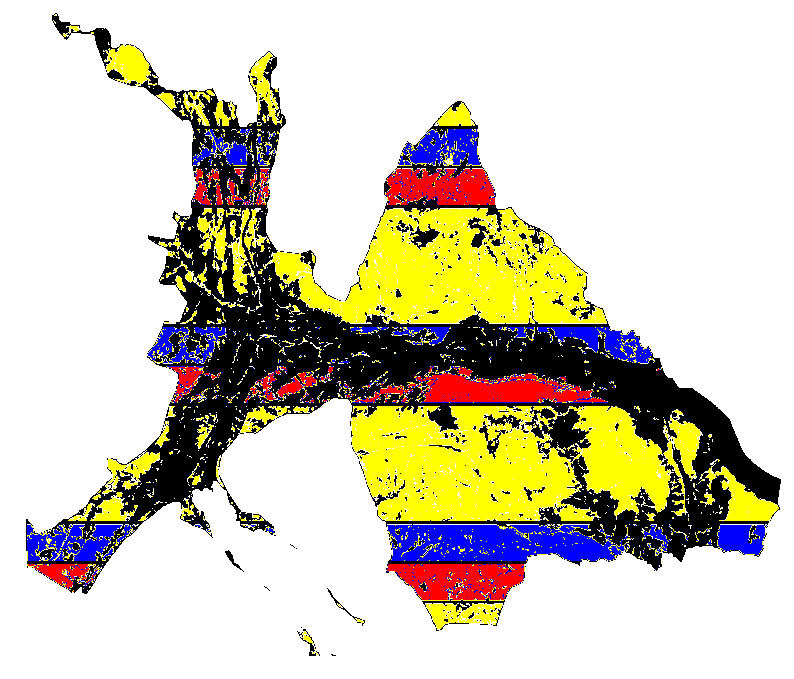

In [39]:
plot_patch(341)

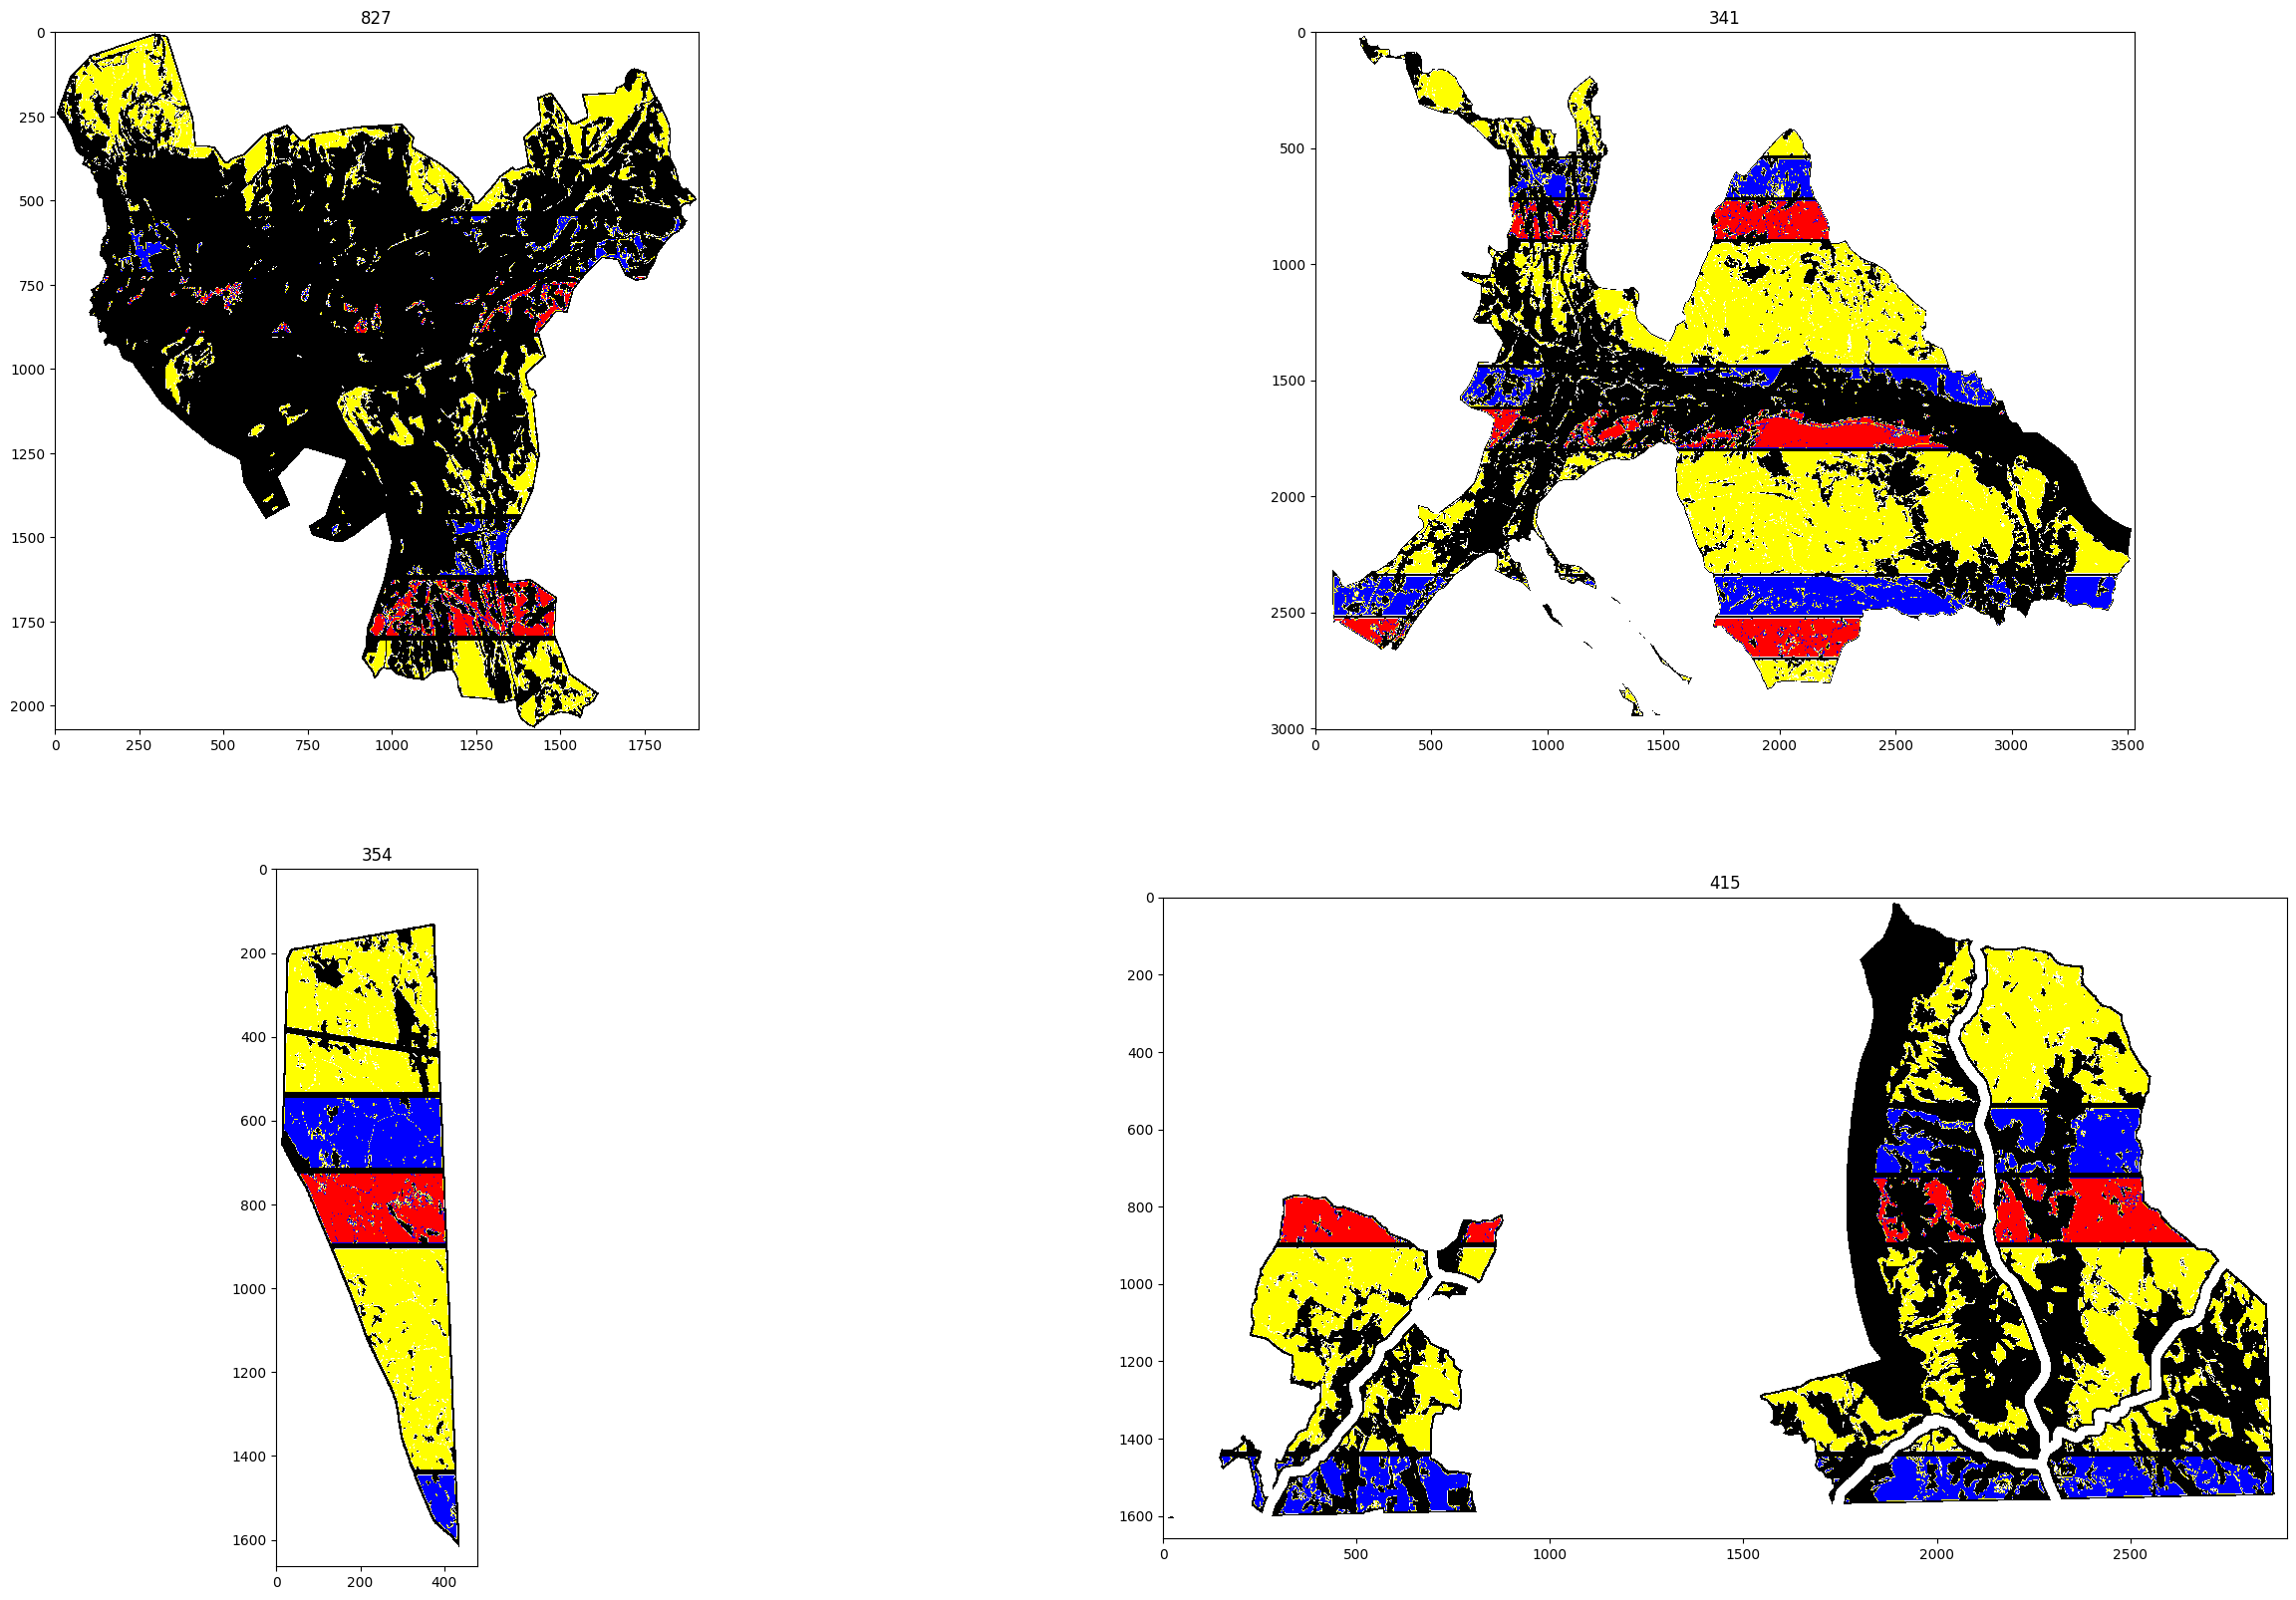

In [34]:
plot_patches([827,341,354,415])

In [19]:
%matplotlib inline
import rasterio
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict
plt.rcParams["image.cmap"] = "afmhot"

rasterfile = rasterio.open("/home/eliot/igp/pdm/rs-uncertainty/data/pkl_dev/2023-03-09_12-47-53/info_map_827.tif")

valid_centers = rasterfile.read(1).astype(np.float16)
split_mask = rasterfile.read(2).astype(np.float16)
num_images_per_pixel = rasterfile.read(3).astype(np.float16)
valid_mask = rasterfile.read(4).astype(np.float16)
polygon = rasterfile.read(5).astype(np.float16)

# def show_dataset(valid_mask, split_mask, polygon, valid_centers, ax):
#     """ 
#     - polygon outline in white (1)
#     - invalid pixels in black (0)
#     """
    
#     valid_centers
#     # invert and transparent polygon
#     polygon[polygon==1] = np.nan # white -> transparent
#     polygon[polygon==0] = 1
#     # transparent valid pixel
#     valid_centers[valid_centers==1] = np.nan
#     # valid_centers to split: invalid (nan), train (1), val (2), test (3)
#     split_centers = np.fill(np.nan, split_mask.shape)
#     split_centers = np.where(valid_mask==1, split_centers, split_mask+1)
#     # show 
#     ax.imshow(valid_centers)
#     ax.imshow
#     ax.imshow(polygon) # last calc

# def validity_map(valid_mask, ax):
#     cmap = matplotlib.colors.ListedColormap(["black", "white"])
#     ax.imshow(valid_mask, cmap=cmap)
#     ax.set_title("validity map")
#     return ax

# def splits_map(split_mask, polygon, ax):
#     split_mask += 1.
#     split_mask[polygon==0]=np.nan
#     ax.imshow(split_mask)
#     ax.set_title("cross validation splits")
#     return ax

# def image_density(valid_mask, num_images_per_pixel, ax):
#     #cmap = matplotlib.colors.ListedColormap(["black", "green", ""])
#     ax.imshow(valid_mask)
#     ax.imshow(num_images_per_pixel)
#     ax.set_title("image density")
#     return ax

# def centers_map(valid_mask, valid_centers, polygon, split_mask, ax):
#     cmap = matplotlib.colors.ListedColormap(["black", "white"])
#     ax.imshow(valid_mask, cmap=cmap)
#     polygon = (~polygon).astype(int)
#     ax.imshow(polygon)
#     valid_centers = valid_centers.astype(np.float16)
#     # valid_centers[valid_centers==0]=np.nan
#     split_mask += 1
#     split_mask = split_mask.astype(np.float16)
#     split_mask[valid_centers==0] = np.nan
#     #ax.imshow(valid_centers, cmap=matplotlib.colors.ListedColormap(["red"]))
#     ax.imshow(split_mask)
#     ax.set_title("centers map")
#     return ax

# _, ax = plt.subplots(2, 2, figsize=(23,23))
# validity_map(valid_mask, ax[0,0])
# splits_map(split_mask, polygon, ax[0,1])
# image_density(valid_mask, num_images_per_pixel, ax[1,0])
# centers_map(valid_mask, valid_centers, polygon, split_mask, ax[1,1])
# plt.show()

IndexError: band index 5 out of range (not in (1, 2, 3, 4))

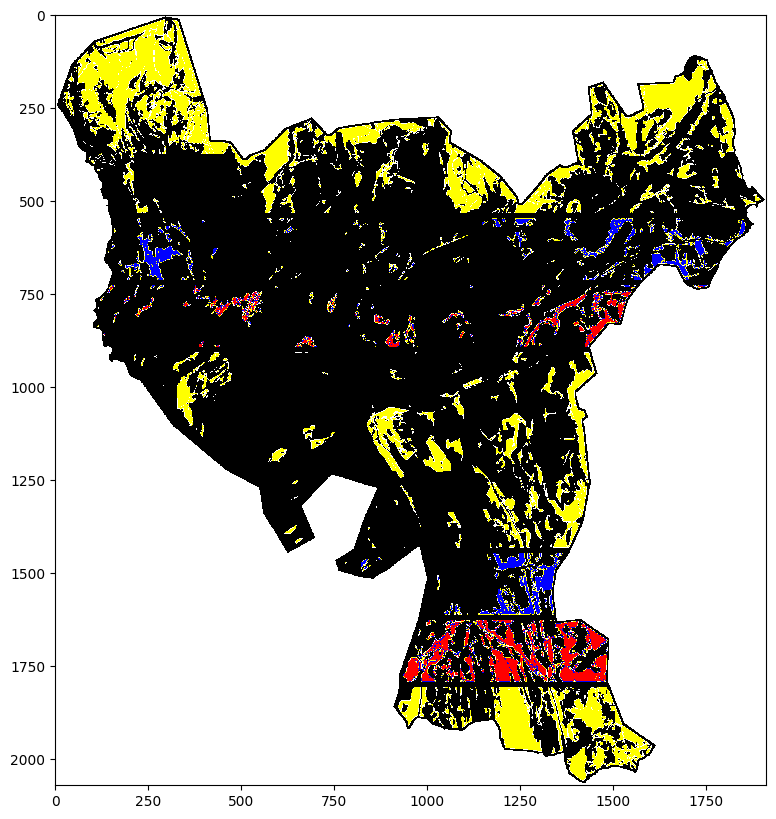

In [ ]:
plt.figure(figsize=(10,10))
dataset = split_mask.copy()
dataset += 2
dataset[valid_mask==0]=1 # valid mask: black
dataset[valid_centers==0]=0 # valid centers => 
dataset[polygon==0]=np.nan 
plt.imshow(dataset, cmap=matplotlib.colors.ListedColormap(["black", "white", "yellow", "blue", "red"]))

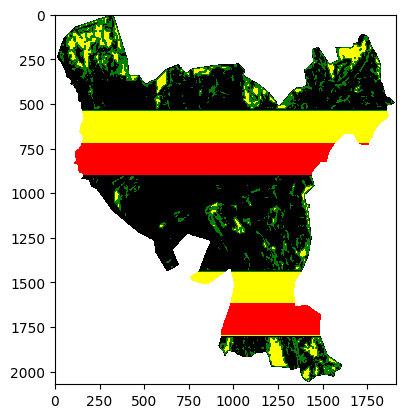

In [106]:
split_mask += 1.
split_mask[polygon==0]=np.nan
valid_centers[valid_mask==0] = 0
valid_centers[polygon==0]=np.nan
valid_centers[split_mask==np.nanmin(split_mask)+1] = 1 # train
valid_centers[split_mask==np.nanmin(split_mask)+2] = 2 # val
valid_centers[split_mask==np.nanmin(split_mask)+3] = 3 # test


plt.imshow(valid_centers, cmap=matplotlib.colors.ListedColormap(["black", "green", "yellow", "red"]))

In [107]:
np.unique(valid_centers)

array([ 0.,  1.,  2., nan], dtype=float16)

In [99]:
(split_mask==split_mask.max()-3).any()

False

In [97]:
split_mask.min()

nan

In [100]:
np.unique(split_mask)

array([ 2.,  3.,  4., nan], dtype=float16)

In [102]:
split_mask.max()

nan

In [127]:
x = np.zeros((10, 10))
idx = [(1,2), (3,4)]
idx = np.array(idx)
print(idx.shape)
x[idx[:,0],idx[:,1]] = -10
x

(2, 2)


array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., -10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., -10.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [126]:
idx

array([[1, 2],
       [3, 4]])